# Image Characterization

due Friday October 22, at 11:59 PM

In this project we will render an image using characters.

Note this is a **short** project which will consist of **code only**. No text/narrative is necessary for this project.

The project will be graded following this rubric

| Category | percentage |
| --- | --- |
| Code correctness and | 70% |
| completeness | |
|||
| Report organization | 30% |
|(includes code comments)| |

## Part 1

Import all characters and generate an image for each character. We will use the module `string` for a string of all printable characters.

In [1]:
import string

string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

**Note**: we are going to discard the last 5 characters (tab, newline, carriage return, ...)

In [2]:
list_of_characters = string.printable[:-5]
list_of_characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

The function `char2array` given a character `char`, returns an array representation of the character and the shape of the array returned

**Note**: the function utilizes the `cv2` module to resize the image. You will need to install the module running 

`!pip install opencv-python`

in a code cell of jupyter notebook.

You need to run the command once (so please do not put the install command in the project notebook)

In [3]:
import io
import cv2

def char2array(char,width=15,height=24):
    # given a character, it will return a (height x width) numpy array 
    # containing the character as an image (in grayscale)
    
    plt.figure(figsize=(4,4))
    plt.axis("equal") # same scale for axis
    plt.axis('off')   # remove axis
    plt.text(0,0,char, # print character in image
             ha='center',va='center',
            fontfamily='monospace',size=280, color='k')
    
    with io.BytesIO() as buff: # save image in memory
        plt.savefig(buff,bbox_inches='tight',format='png', 
                    #pad_inches=0.1,
                    dpi=8)
        buff.seek(0)
        img=plt.imread(buff)
    plt.close() # close image
    
    output=cv2.resize(img,(width,height),interpolation=cv2.INTER_NEAREST) # resize image
    
    return output, output.shape

**Example**

(24, 15, 4)


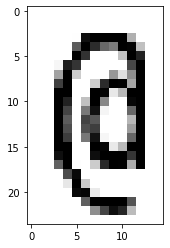

In [4]:
import matplotlib.pyplot as plt

At,s=char2array('@')

print(s) # array shape

plt.imshow(At)
plt.show()

**Note** You should also compute the average *color value* for each character (in gray scale); it will come handy for part 3 of the project.

## Part 2

Choose an image, import it in the notebook and change to gray scale

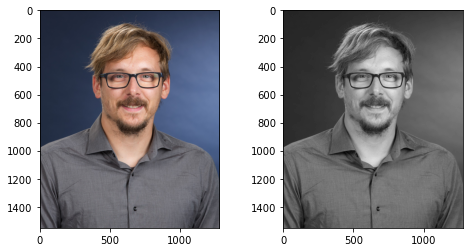

In [5]:
s=plt.imread('EmbeddedImage.jpg')
sg=0.299*s[:,:,0] + 0.587*s[:,:,1] + 0.114*s[:,:,2]
p=plt.imread('pumpkin.jpeg')
pg=0.299*s[:,:,0] + 0.587*s[:,:,1] + 0.114*s[:,:,2]

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(s)
plt.subplot(122)
plt.imshow(sg,cmap='gray')
plt.savefig("s_gray.png")

![simo](EmbeddedImage.jpg "")

![simo2](s_gray.png "")

## Part 3

Here we substitute the letters in the image. We will replace patches of the image with the letter that has a similar *color value* as the image.

![example](example.png "")

The final result should look like this

![s_char](simo_char.png "")

**Note** The image you characterize, should have a large number of pixels (>2000) in each dimension to ensure a good approximation with characters.

Look at the example below using this Halloween themed image

![p](pumpkin.jpeg "")

This is the *characterization* with the original image

![pl](pumpkin_low.png "")

Whereas here is the *characterization* of the same image rescaled by a factor of 3

![ph](pumpkin_high.png "")

You can resize an image using the following code from the `cv2` module. The variable `factor` will set the scaling factor. For example `factor=3` will increase the image dimensions threefold.

In [ ]:
img=plt.imread(image_name) # image

width = int(img.shape[1] * factor )
height = int(img.shape[0] * factor )
dim = (width, height)
  
# resize image
img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

## Project

* Create a function called `char_me` that returns a characterized image
* *Characterize* at least one of the images given above
* Take a picture of yourself and *characterize* it

**Hint/Note** when you characterize the image you might notice that it is very dark, and there are little details. You should rescale your characters *color value* to cover a broader spectrum, and have a more clear output image.